# Praca Domowa 3 - Wstęp do uczenia maszynowego
## Kinga Ułasik IiAD 03.04.2021

# Potrzebne importy

In [11]:
import pandas as pd
import pylab as pl
import numpy as np
import sklearn 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import matplotlib.ticker as ticker
from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score

# Mini EDA
Na początku wczytajmy i rzućmy okiem na dane w tabeli

In [4]:
australia = pd.read_csv('australia.csv')
australia.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,17.9,35.2,0.0,12.0,12.3,48.0,6.0,20.0,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,0,0
1,18.4,28.9,0.0,14.8,13.0,37.0,19.0,19.0,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,0,0
2,19.4,37.6,0.0,10.8,10.6,46.0,30.0,15.0,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,0,0
3,21.9,38.4,0.0,11.4,12.2,31.0,6.0,6.0,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,0,0
4,24.2,41.0,0.0,11.2,8.4,35.0,17.0,13.0,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,0,0


### Opis nazw kolumn
* MinTemp - Minimalna temperatura [C]
* MaxTemp - Maksymalna temperatura [C]
* Rainfall - Suma opadów [mm]
* Evaporation - Miara odparowywania [mm]
* Sunshine - Suma czasu nasłonecznienia [h]
* WindGustSpeed - Najwyższa prędkość wiatru [km/h]
* WindSpeed9am - Prędkość wiatru o 9:00 [km/h]
* WindSpeed3pm - Prędkość wiatru o 15:00 [km/h]
* Humidity9am - Wilgotność o 9:00 [%]
* Humidity3pm - Wilgotność o 15:00 [%]
* Pressure9am - Ciśnienie atmosferyczne o 9:00 [hPa]
* Pressure3pm - Ciśnienie atmosferyczne o 15:00 [hPa]
* Cloud9am - Zachmurzenie o 9:00 [skala: 0 - słońce, 8 - całkowite zachmurzenie]
* Cloud3pm - Zachmurzenie o 15:00 [skala: 0 - słońce, 8 - całkowite zachmurzenie]
* Temp9am - Temperatura o 9:00 [C]
* Temp3pm - Temperatura o 15:00 [C]
* RainToday - Czy dzisiaj padał deszcz [0 - nie, 1 - tak]
* Zmienna celu: RainTomorrow - Czy jutro będzie padał deszcz [0 - nie, 1 - tak]

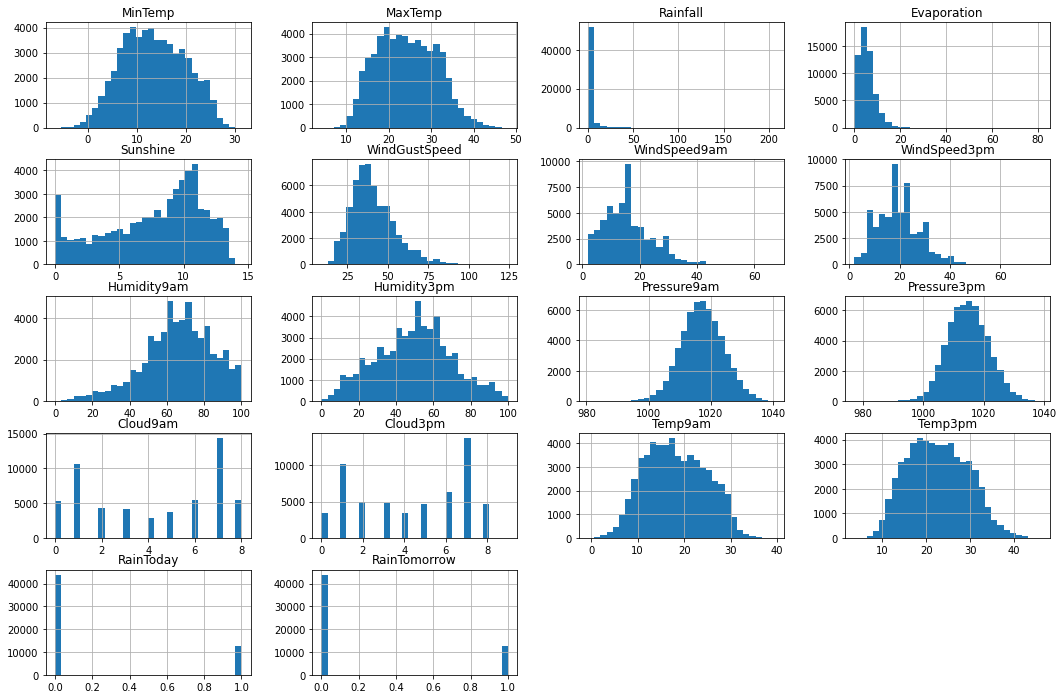

In [5]:
australia.hist(figsize=(18, 12), bins=30)
plt.show()

Zauważmy, że większość zmiennych przyjmuje rozkład normalny, co jest korzystne dla tworzenia modeli. Najbardziej skrzywione rozkłady przyjmują Rainfall i Evaporation (wyrażnie skrzywione na lewo).

<AxesSubplot:>

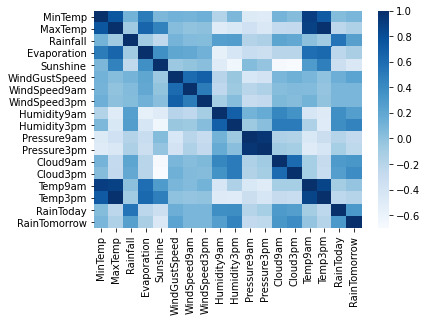

In [4]:
plt.figure(figsize=(6,4))
sns.heatmap(australia.corr(), cmap='Blues',annot=False)

<AxesSubplot:>

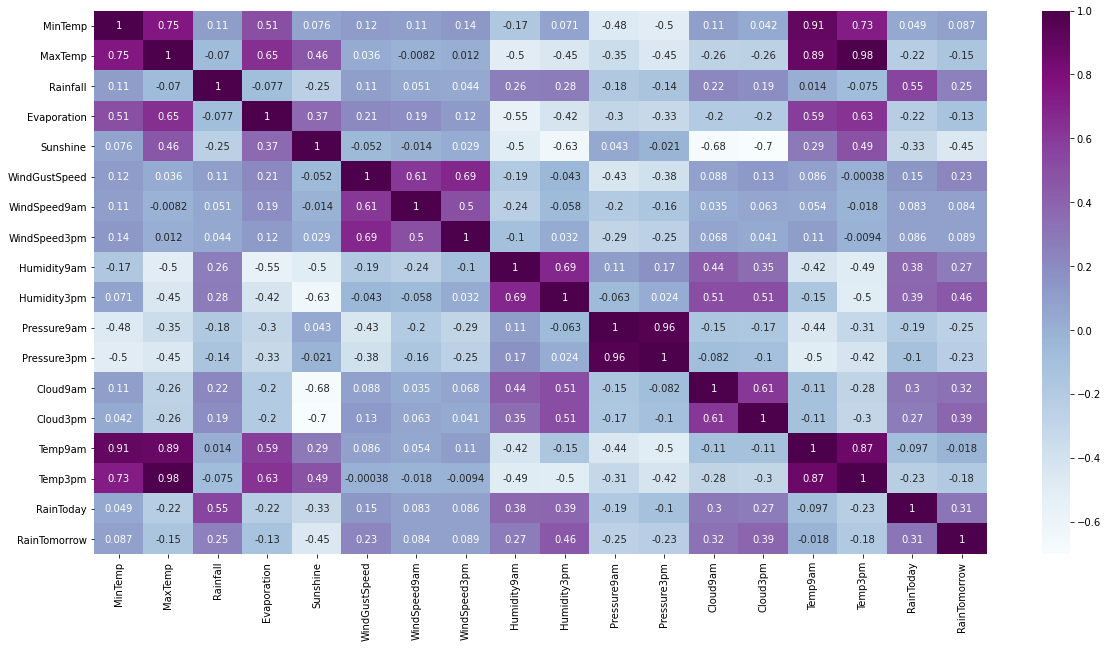

In [5]:
plt.figure(figsize=(20,10))
plot = australia.corr()
sns.heatmap(plot, cmap = 'BuPu',annot=True)

Wypisz najsilniejsze korelacje występują między zmiennymi, aby wiedzieć jakich par unikać przy tworzeniu modelu:
* MinTtemp, MaxTemp
* Temp3am, Temp9pm
* Temp, Humidity
* Cloud, Sunshine
* WinGustSpeed3am, WinGustSpeed9om, WinGustSpeed
* Evaporation, MaxTemp
* Humidity3am, Humisity9pm
* Humidity, Cloud
* RainToday, Rainfall

# Budowanie modeli

## Logictic Regression

In [8]:
logreg_clf = LogisticRegression()
X = australia[['RainToday','Cloud3pm','Humidity3pm','Rainfall','WindGustSpeed']]
y = australia['RainTomorrow']

#podział zbioru na testowy i treningowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
logreg_clf.fit(X_train, y_train)

y_pred_logreg = logreg_clf.predict(X_test)

In [62]:
#wstępna ewaluacja

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, y_pred_logreg)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, y_pred_logreg)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, y_pred_logreg)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_pred_logreg)
print('F1 score: %f' % f1)

Accuracy: 0.848015
Precision: 0.706528
Recall: 0.503292
F1 score: 0.587839


### Dobieranie hiperparametrów
 * penalty - used to specify the norm used in the penalization
 * C - inverse of regularization strength, smaller values specify stronger regularization
 * solver - algorithm to use in the optimization problem

In [24]:
grid_values = {'penalty': ['l1', 'l2'],'C':[0.001,.009,0.01,.09,1,5,10,25], 'solver': ['newton-cg', 'lbfgs', 'liblinear']}
grid_clf_acc = GridSearchCV(logreg_clf, param_grid = grid_values, scoring = 'accuracy')
grid_clf_acc.fit(X_train, y_train)

y_pred_acc = grid_clf_acc.predict(X_test)

# New Model Evaluation metrics 
print(grid_clf_acc.best_params_)
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred_acc)))
print('Precision Score : ' + str(precision_score(y_test,y_pred_acc)))
print('Recall Score : ' + str(recall_score(y_test,y_pred_acc)))
print('F1 Score : ' + str(f1_score(y_test,y_pred_acc)))


{'C': 0.001, 'penalty': 'l2', 'solver': 'newton-cg'}
Accuracy Score : 0.8491669620701878
Precision Score : 0.7166666666666667
Recall Score : 0.49547325102880657
F1 Score : 0.5858880778588808


In [19]:
#budowanie modelu z hiperparametrami
logreg_clf = LogisticRegression(penalty = 'l2', C=0.001, solver='newton-cg')
logreg_clf.fit(X_train, y_train)

y_pred_logreg = logreg_clf.predict(X_test)

### Ewaluacja

In [26]:
#kroswalidacja
from sklearn.model_selection import cross_validate
print(np.mean(cross_validate(logreg_clf, X_test, y_test, cv=20, scoring='accuracy').get('test_score')))

0.8481933722462811


Otrzymaliśmy wynik niewiele gorszy niż poprzednie (różnica na 3cim miejscu po przecinku)

In [25]:
#classification report - precision i recall z podziałem na klasy

#Precision mówi ile jedynek jest faktycznie jedynkami a recall ile prawdziwych jedynek wykryłaś
print(metrics.classification_report(y_test, y_pred_logreg))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      8854
           1       0.72      0.50      0.59      2430

    accuracy                           0.85     11284
   macro avg       0.79      0.72      0.75     11284
weighted avg       0.84      0.85      0.84     11284



Cieszy nas wysoki recall

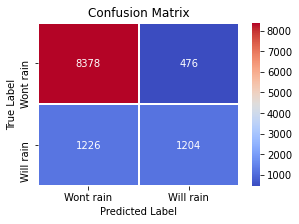

In [23]:
def show_confusion_matrix(validations, predictions):
    LABELS = ['Wont rain','Will rain']
    matrix = metrics.confusion_matrix(validations, predictions)
    # plt.figure(dpi=400,figsize=(4.5, 3))
    plt.figure(figsize=(4.5, 3))
    sns.heatmap(matrix,
                cmap='coolwarm',
                linecolor='white',
                linewidths=1,
                xticklabels=LABELS,
                yticklabels=LABELS,
                annot=True,
                fmt='d')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()
    
show_confusion_matrix(y_test, y_pred_logreg)

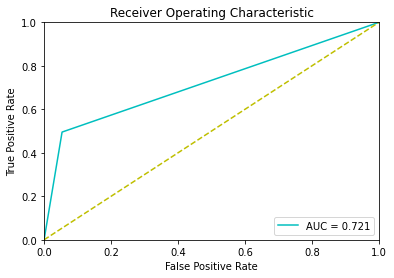

In [115]:
#wynerowanie krzywej ROC i określenie AUC (pola pod krzywą)

fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred_logreg)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'c', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'y--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


## Ada Boost Classifier

In [27]:
ada_clf = AdaBoostClassifier(random_state=1,learning_rate=0.15,algorithm ='SAMME.R')

X = australia[['RainToday','Cloud3pm','Humidity3pm','Rainfall','WindGustSpeed']]
y = australia['RainTomorrow']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
ada_clf.fit(X_train, y_train)
y_pred_ada = ada_clf.predict(X_test)


In [47]:
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, y_pred_ada)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, y_pred_ada)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, y_pred_ada)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_pred_ada)
print('F1 score: %f' % f1)

Accuracy: 0.848458
Precision: 0.762391
Recall: 0.430453
F1 score: 0.550237


### Dobieranie hiperparametrów
* learnin_rate - shrinks the contribution of each classifier by learning_rate, there is a trade-off between learning_rate and n_estimators
* n_estimators - shrinks the contribution of each classifier by learning_rate. There is a trade-off between learning_rate and n_estimators

In [93]:
#szukamy najbardziej optymalnego learning rate 
from numpy import arange

i = arange(0.1, 2.1, 0.1)
grid_values = {'learning_rate':i }
grid_clf_acc_ada = GridSearchCV(ada_clf, param_grid = grid_values,scoring = 'accuracy')
grid_clf_acc_ada.fit(X_train, y_train)

#Predict values based on new parameters
y_pred_acc = grid_clf_acc_ada.predict(X_test)

# New Model Evaluation metrics 
print(grid_clf_acc_ada.best_params_)
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred_acc)))
print('Precision Score : ' + str(precision_score(y_test,y_pred_acc)))
print('Recall Score : ' + str(recall_score(y_test,y_pred_acc)))
print('F1 Score : ' + str(f1_score(y_test,y_pred_acc)))

{'learning_rate': 0.30000000000000004}
Accuracy Score : 0.8493442041829139
Precision Score : 0.7236519607843137
Recall Score : 0.4860082304526749
F1 Score : 0.5814869522402757


In [28]:
ada_clf = AdaBoostClassifier(n_estimators= 500,random_state=1,learning_rate=0.3,algorithm ='SAMME.R')
ada_clf.fit(X_train, y_train)

y_pred_ada = ada_clf.predict(X_test)

### Ewaluacja

In [29]:
from sklearn.model_selection import cross_validate
print(np.mean(cross_validate(ada_clf, X_test, y_test, cv=20, scoring='accuracy').get('test_score')))

0.8474844662022217


In [100]:
print(metrics.classification_report(y_test, y_pred_ada))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      8854
           1       0.72      0.48      0.58      2430

    accuracy                           0.85     11284
   macro avg       0.80      0.72      0.74     11284
weighted avg       0.84      0.85      0.84     11284



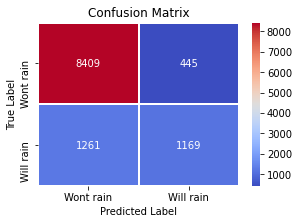

In [101]:
show_confusion_matrix(y_test, y_pred_ada)

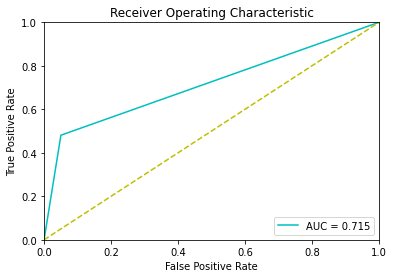

In [116]:
#AUC curve
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred_ada)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'c', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'y--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


## Random Forest

In [30]:
from sklearn.ensemble import RandomForestClassifier

X = australia[['Sunshine','Cloud3pm','Humidity3pm','Rainfall','WindGustSpeed']]
y = australia['RainTomorrow']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

rf_clf = RandomForestClassifier(n_estimators=1000)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)

In [22]:

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, y_pred_rf)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, y_pred_rf)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, y_pred_rf)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_pred_rf)
print('F1 score: %f' % f1)

Accuracy: 0.845711
Precision: 0.733876
Recall: 0.444856
F1 score: 0.553933


### Dobieranie hiperparametrów
* n_estimators - the number of trees in the forest
* max_features - the number of features to consider when looking for the best split
* min_samples_split - the minimum number of samples required to split an internal node
* min_samples_leaf - the minimum number of samples required to be at a leaf node

In [105]:
from numpy import arange

grid_values = {'max_features': ['sqrt', 'auto'], 
               'min_samples_split' : [2, 5, 10],
               'min_samples_leaf' : [1, 2, 4]
              }
grid_clf_acc_rf = GridSearchCV(rf_clf, param_grid = grid_values,scoring = 'accuracy')
grid_clf_acc_rf.fit(X_train, y_train)

y_pred_acc = grid_clf_acc_rf.predict(X_test)

print(grid_clf_acc_rf.best_params_)
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred_acc)))
print('Precision Score : ' + str(precision_score(y_test,y_pred_acc)))
print('Recall Score : ' + str(recall_score(y_test,y_pred_acc)))
print('F1 Score : ' + str(f1_score(y_test,y_pred_acc)))

{'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy Score : 0.8489897199574619
Precision Score : 0.7649635036496351
Recall Score : 0.4312757201646091
F1 Score : 0.5515789473684211


In [106]:
rf_clf = RandomForestClassifier(n_estimators=1000, max_depth=5, min_samples_split = 2, min_samples_leaf = 1, 
                                  max_features = 'sqrt')
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)

In [114]:
#rysowanie pierwszego drzewa w lesie (po prostu dla ciekawostki)
import os
from sklearn.tree import export_graphviz
import six
import pydot
from sklearn import tree
dotfile = six.StringIO()
i_tree = 0

col =['Sunshine','Cloud3pm','Humidity3pm','Rainfall','WindGustSpeed']
tree_in_forest = rf_clf.estimators_[0]
export_graphviz(tree_in_forest,out_file='tree_new.dot',
feature_names=col,
filled=True,
rounded=True)
(graph,) = pydot.graph_from_dot_file('tree_new.dot')
name = 'tree' + str(i_tree)
graph.write_png(name+  '.png')
os.system('dot -Tpng tree_new.dot -o tree_new.png')
i_tree +=1


![Pierwsze drzewo w Random Forest](tree_new.png)

### Ewaluacja

In [107]:
from sklearn.model_selection import cross_validate
print(np.mean(cross_validate(rf_clf, X_test, y_test, cv=20, scoring='accuracy').get('test_score')))

0.8481037783217221


In [108]:
print(metrics.classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91      8854
           1       0.76      0.43      0.55      2430

    accuracy                           0.85     11284
   macro avg       0.81      0.70      0.73     11284
weighted avg       0.84      0.85      0.83     11284



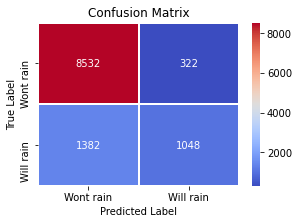

In [110]:
show_confusion_matrix(y_test, y_pred_rf)

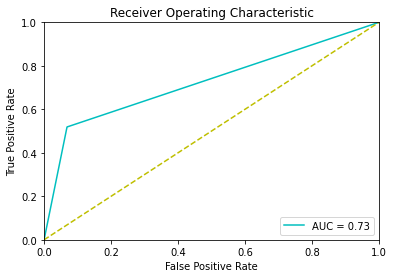

In [31]:
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred_rf)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'c', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'y--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Wybranie najlepszego modelu
Generalnie wszystkie modele wypadły bardzo podobnie z accuracy około 0.84- 0.85. Największym napotkanym problemem było stosunkowo niskie precision i recall dla klasy '1' (czyli dla stwierdzenia że będzie padać) co jest bardzo niekorzystne (ponieważ ze wszystkich 4rech kombinacji najwięcej szkód jest wyrządzonych i ludzie są niezadowoleni jeśli zapowiedziano brak deszczu, a deszcze jednak padał). //
Najlepiej wypadł model zbudowany za pomocą LogicticRegression. Osiąga on najwyższe accuracy (ok. 0.8481) przy krodwalidacji, również AUC tego modelu jest największe (0.721). Dodatkowo, gdy porównamy confusion matrix wszystkich modeli to zauważymy że ten model ma najmniejszą liczbę najbardziej niekorzystnych przypadków (czyli tych gdzie przewidujemy że nie będzie padać, a pada) 